In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-purchases/Ecommerce Purchases


In [2]:
# The data set contains information on customer purchases, such as their address, credit card information, email, job title, and purchase details like the purchase price, time of purchase (AM or PM), and language. Some insights you could try to get using pandas are:

# The average purchase price and the most popular purchase price range.
# The most commonly used credit card provider and its market share.
# The number of purchases made during AM and PM.
# The most common language among customers and its market share.
# The most common job titles among customers.
# The geographic distribution of customers based on their IP addresses.
# The most popular browser and its market share among customers.
# The relationship between job titles and purchase amounts.
# The relationship between purchase amounts and the time of purchase (AM or PM).
# The relationship between purchase amounts and credit card providers.
# The average purchase price by language.
# The correlation between purchase amount and credit card security code.
# The average purchase price by job title.
# The relationship between purchase price and lot number.
# The relationship between purchase price and company.

In [3]:
data = pd.read_csv("/kaggle/input/ecommerce-purchases/Ecommerce Purchases")
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [4]:
print(data.dtypes)

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object


In [5]:
max_price = data["Purchase Price"].max()
min_price = data["Purchase Price"].min()

edge_prices = pd.Series({"max_price":max_price, "min_price":min_price })
print(edge_prices)

max_price    99.99
min_price     0.00
dtype: float64


In [6]:
len(data[data["Language"]=="fr"])

1097

In [7]:
len(data[data["Job"].str.contains("Engineer")])

453

In [8]:
ip = data[data["IP Address"]=="132.207.160.22"]
ip["Email"]

2    amymiller@morales-harrison.com
Name: Email, dtype: object

In [9]:
master_card = data[(data["CC Provider"] == "Mastercard") & (data["Purchase Price"]>50)].count()
print(master_card)

Address             405
Lot                 405
AM or PM            405
Browser Info        405
Company             405
Credit Card         405
CC Exp Date         405
CC Security Code    405
CC Provider         405
Email               405
Job                 405
IP Address          405
Language            405
Purchase Price      405
dtype: int64


In [10]:
data.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [11]:
person_to_find = data[data["Credit Card"] == 4664825258997302]
print(person_to_find["Email"])

9992    bberry@wright.net
Name: Email, dtype: object


In [12]:
am = data[data["AM or PM"] == "AM"].value_counts()
pm = len(data[data["AM or PM"] == "PM"])
print(am)

Address                                                     Lot    AM or PM  Browser Info                                                                                                                                        Company                       Credit Card       CC Exp Date  CC Security Code  CC Provider                  Email                                  Job                                  IP Address       Language  Purchase Price
00009 Sharon Forks Apt. 078\nWest Sabrinabury, MA 45611     65 dS  AM        Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_4) AppleWebKit/5320 (KHTML, like Gecko) Chrome/15.0.833.0 Safari/5320                                   Lopez, Barton and Miller      60423591589       04/17        362               VISA 16 digit                hhurst@gmail.com                       Development worker, community        254.48.96.123    fr        17.20             1
750 Dunn Knolls\nShermanfurt, WV 69310-0308                 42 KU  AM        Opera/9.76.(Wind

In [13]:
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [14]:
#The average purchase price and the most popular purchase price range.

purchase_average = data["Purchase Price"].mean()
range_price = data["Purchase Price"].describe()[["min", "max"]]
print(f"The average price is {purchase_average} and the range is {range_price}")

The average price is 50.347302 and the range is min     0.00
max    99.99
Name: Purchase Price, dtype: float64


In [15]:
# The most commonly used credit card provider and its market share.

market_share = data["CC Provider"].value_counts(normalize=True)*100
print(market_share.idxmax(),market_share.max() )

JCB 16 digit 17.16


In [16]:
#The number of purchases made during AM and PM.
columns = data.columns
#print(columns)
am_pm = data["AM or PM"].value_counts()
am_pm

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [17]:
#The most common language among customers and its market share.

#print(columns)
most_common_language = data["Language"].value_counts()
repetitions = most_common_language
language_str = most_common_language.index[0]
print(f"{language_str.upper()} with {repetitions[0]} repetitions")
market_shere_language = data["Language"].value_counts(normalize=True)*100
print(market_shere_language.idxmax(), market_shere_language.max())


DE with 1155 repetitions
de 11.55


In [18]:
#The most common job titles among customers.
print(columns)

commont_job_counts = data["Job"].value_counts()
commont_job_counts.head(5)


Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')


Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64

In [19]:
# The geographic distribution of customers based on their IP addresses.

grouped = data.groupby(['Address', 'IP Address'])
grouped.size()

Address                                                      IP Address    
000 Jared Shoals Apt. 244\nRamirezmouth, IL 12450            91.169.108.79     1
000 Martin Shoal Apt. 004\nNew Megan, FM 61399               60.199.17.99      1
000 Mills Expressway Apt. 223\nGutierrezview, NC 02682-8387  139.6.109.29      1
00009 Sharon Forks Apt. 078\nWest Sabrinabury, MA 45611      254.48.96.123     1
0001 Cynthia Branch Apt. 359\nNew Alex, OH 36278-8276        40.248.47.71      1
                                                                              ..
Unit 9897 Box 9570\nDPO AA 35638                             209.226.36.235    1
Unit 9920 Box 5671\nDPO AP 70439                             45.252.40.82      1
Unit 9938 Box 3602\nDPO AE 90057-5180                        190.247.95.182    1
Unit 9980 Box 9237\nDPO AP 27028                             253.117.240.86    1
Unit 9991 Box 3616\nDPO AA 99399                             139.255.97.152    1
Length: 10000, dtype: int64

In [20]:
# The relationship between job titles and purchase amounts.

data.columns

data.groupby("Job")["Purchase Price"].mean()



Job
Academic librarian                  47.951818
Accommodation manager               37.038235
Accountant, chartered               52.565500
Accountant, chartered certified     57.945000
Accountant, chartered management    69.082667
                                      ...    
Water quality scientist             46.526111
Web designer                        59.764500
Wellsite geologist                  51.309167
Writer                              44.863000
Youth worker                        40.513333
Name: Purchase Price, Length: 623, dtype: float64

AM or PM
AM    50.186511
PM    50.503779
Name: Purchase Price, dtype: float64


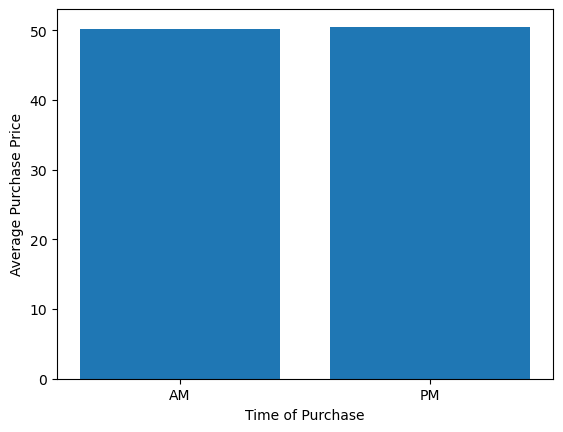

In [21]:
# The relationship between purchase amounts and the time of purchase (AM or PM)

purchase_by_time = data.groupby("AM or PM")["Purchase Price"].mean()
print(purchase_by_time)

import matplotlib.pyplot as plt

plt.bar(purchase_by_time.index, purchase_by_time.values)
plt.xlabel("Time of Purchase")
plt.ylabel("Average Purchase Price")
plt.show()


In [22]:
#The average purchase price by language.
avr_purchase = data.groupby("Language")["Purchase Price"].mean()
print(avr_purchase)

Language
de    50.254485
el    51.555356
en    51.103015
es    49.366977
fr    49.476718
it    50.001004
pt    51.215546
ru    49.927134
zh    50.180198
Name: Purchase Price, dtype: float64


In [23]:
#Train a linear regression model to predict 
# the purchase price based on the lot size and the year built. 
# Use the train_test_split() function to split the dataset into a 
# training set and a validation set, with a ratio of 80% training and 20% 
# validation. Train the model on the training set and evaluate its 
# performance on the validation set by calculating the mean squared error 
# (MSE) and the R-squared score.

from sklearn.model_selection import train_test_split

X = data["Language"]
y = data["Purchase Price"]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)
print(train_X)
print(val_X)
print(train_y)
print(val_y)

9524    el
8749    it
9858    pt
6979    fr
224     fr
        ..
3122    en
3777    de
5795    de
8636    fr
1604    es
Name: Language, Length: 8000, dtype: object
9169    ru
3968    zh
7144    it
646     zh
1766    zh
        ..
9975    zh
8894    en
7227    es
7823    en
4260    el
Name: Language, Length: 2000, dtype: object
9524    28.60
8749    56.13
9858    91.79
6979    85.53
224      7.42
        ...  
3122    98.82
3777    16.85
5795    14.27
8636    44.81
1604    22.55
Name: Purchase Price, Length: 8000, dtype: float64
9169    86.83
3968    65.36
7144    23.13
646     94.64
1766    96.53
        ...  
9975     3.77
8894    58.86
7227    11.67
7823     6.89
4260    34.28
Name: Purchase Price, Length: 2000, dtype: float64


In [24]:
train_data = pd.concat([train_X, train_y], axis=1)
val_data = pd.concat([val_X, val_y], axis=1)

print(train_data)
print(val_data)

     Language  Purchase Price
9524       el           28.60
8749       it           56.13
9858       pt           91.79
6979       fr           85.53
224        fr            7.42
...       ...             ...
3122       en           98.82
3777       de           16.85
5795       de           14.27
8636       fr           44.81
1604       es           22.55

[8000 rows x 2 columns]
     Language  Purchase Price
9169       ru           86.83
3968       zh           65.36
7144       it           23.13
646        zh           94.64
1766       zh           96.53
...       ...             ...
9975       zh            3.77
8894       en           58.86
7227       es           11.67
7823       en            6.89
4260       el           34.28

[2000 rows x 2 columns]


In [25]:
train_language_purchase = train_data.groupby('Language')['Purchase Price'].mean()
print(train_language_purchase)

Language
de    50.238861
el    52.170778
en    51.420811
es    49.981399
fr    50.225477
it    50.476066
pt    51.568838
ru    49.773029
zh    50.324254
Name: Purchase Price, dtype: float64


In [26]:
val_language_purchase = val_data.groupby('Language')['Purchase Price'].mean()
print(val_language_purchase)

Language
de    50.313430
el    48.870142
en    49.856054
es    47.142616
fr    46.440276
it    47.947059
pt    49.797623
ru    50.533675
zh    49.590817
Name: Purchase Price, dtype: float64


In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(val_language_purchase, train_language_purchase)
print(mae)

1.928694522007429


In [28]:

# Train a decision tree model to predict whether a purchase was made in the AM 
# or PM based on the purchase price, the lot size, 
# and the year built. Use the train_test_split() 
# function to split the dataset into a training set and a 
# validation set, with a ratio of 70% training and 30% validation. 
# Train the model on the training set and evaluate its performance 
# on the validation set by calculating the accuracy, precision, recall, 
# and F1 score.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#print(data.columns)
X = data[['Purchase Price']]
y = data["AM or PM"]

train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)

val_y_predictions = clf.predict(val_x)

print("Accuracy:", accuracy_score(val_y, val_y_predictions))
print('Precision:',precision_score(val_y, val_y_predictions, pos_label='PM'))
print('Recall:', recall_score(val_y, val_y_predictions, pos_label='PM'))
print('F1 Score:', f1_score(val_y, val_y_predictions, pos_label='PM'))

Accuracy: 0.49433333333333335
Precision: 0.49392423159399573
Recall: 0.46066666666666667
F1 Score: 0.47671610900310457
